In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.sparse import hstack
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- **CountVectorizer**: Pretvara tekstualne podatke u numeričke vektore na osnovu pojavljivanja reči.
- **classification_report**: Prikazuje detaljne metrike klasifikacije kao što su preciznost, odziv i F1 skor.
- **StandardScaler**: Standardizuje podatke uklanjanjem srednje vrednosti i skaliranjem prema standardnoj devijaciji. (z-score)
- **OneHotEncoder**: Pretvara kategorijske varijable u binarne vektore.
- **hstack**: Kombinuje više matrica ili vektora u jednu matricu horizontalno.


In [12]:
#from google.colab import drive
#import pandas as pd

# Mount Google Drive
#drive.mount('/content/drive')

# Define the path to the CSV file
file_path = 'preprocessed.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Year,Month,Day,Time of Tweet,text,sentiment,Platform,text_length,Text_Stemmed
0,2018,8,18,morning,great day looks dream,positive,Twitter,37,great day look dream
1,2018,8,18,noon,sorry miss sea beach,positive,Facebook,46,sorri miss sea beach
2,2017,8,18,night,don't angry,negative,Facebook,14,don't angri
3,2022,6,8,morning,attend class listening teachers reading slide ...,negative,Facebook,84,attend class listen teacher read slide nonsens
4,2022,6,8,noon,want go let go,negative,Instagram,33,want go let go


In [8]:
# Preprocess text data
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Text_Stemmed'])

CountVectorizer radi tako što broji koliko često se svaka reč pojavljuje u datom korpusu teksta i zatim konstruiše vektor koji predstavlja svaki dokument u korpusu na osnovu tih brojeva pojavljivanja. Na taj način, svaki dokument se predstavlja kao vektor sa dimenzijama koje odgovaraju broju različitih reči u celom korpusu, a vrednosti u vektoru predstavljaju broj pojavljivanja svake reči u dokumentu.

In [9]:
# Numeric features: Year, Month, Day
X_numeric = data[['Year', 'Month', 'Day']]

In [10]:
# Categorical features: Time of Tweet and Platform
time_encoder = OneHotEncoder()
X_time = time_encoder.fit_transform(data[['Time of Tweet']])
platform_encoder = OneHotEncoder()
X_platform = platform_encoder.fit_transform(data[['Platform']])

In [11]:
# Scale numeric features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [12]:
# Combine text, categorical, and numeric features
X = hstack((X_text, X_time, X_platform, X_numeric_scaled))

In [13]:
# Sentiment labels
y = data['sentiment']

## Trening

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Hiperparametri i njihove default vrednosti**

- **hidden_layer_sizes** (default=(100,)): Broj neurona u svakom skrivenom sloju.
- **activation** (default='relu'): Aktivaciona funkcija za skrivene slojeve.
- **solver** (default='adam'): Optimizator za optimizaciju težina. (Algoritmi za minimizaciju funkcije gubitaka)
- **alpha** (default=0.0001): Jačina L2 regularizacije.
- **batch_size** (default='auto'): Veličina mini-batch-eva za stohastičke optimizatore.
- **learning_rate** (default='constant'): Planiranje stope učenja za ažuriranje težina.
- **learning_rate_init** (default=0.001): Početna stopa učenja.
- **power_t** (default=0.5): Exponent za inverzno skaliranje stope učenja.
- **max_iter** (default=200): Maksimalan broj iteracija.
- **shuffle** (default=True): Da li se mešaju uzorci u svakoj iteraciji.
- **random_state** (default=None): Random seed za reproduktivne rezultate.
- **tol** (default=1e-4): Tolerancija za optimizaciju.
- **verbose** (default=False): Da li se ispisuju progresne poruke.
- **warm_start** (default=False): Da li se koristi prethodno rešenje.
- **momentum** (default=0.9): Momentum za ažuriranje gradijenata.
- **nesterovs_momentum** (default=True): Da li se koristi Nesterov momentum.
- **early_stopping** (default=False): Da li se koristi rano zaustavljanje.
- **validation_fraction** (default=0.1): Proporcija podataka za validaciju kod rano zaustavljanja.
- **beta_1** (default=0.9): Eksponencijalni faktor za prvi moment vektora u Adam optimizatoru.
- **beta_2** (default=0.999): Eksponencijalni faktor za drugi moment vektora u Adam optimizatoru.
- **epsilon** (default=1e-8): Vrednost za numeričku stabilnost u Adam optimizatoru.
- **n_iter_no_change** (default=10): Maksimalan broj epoha bez poboljšanja.
- **max_fun** (default=15000): Maksimalan broj poziva funkcije gubitka.

In [15]:
# Initialize and train the model
model = MLPClassifier(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [50]:
# Dobijanje vrednosti parametara modela
params = model.get_params()

# Ispisivanje vrednosti parametara
print("Parameters of the model:")
for param, value in params.items():
    print(f"{param}: {value}")

Parameters of the model:
activation: relu
alpha: 0.0001
batch_size: auto
beta_1: 0.9
beta_2: 0.999
early_stopping: False
epsilon: 1e-08
hidden_layer_sizes: (100,)
learning_rate: constant
learning_rate_init: 0.001
max_fun: 15000
max_iter: 1000
momentum: 0.9
n_iter_no_change: 10
nesterovs_momentum: True
power_t: 0.5
random_state: 42
shuffle: True
solver: adam
tol: 0.0001
validation_fraction: 0.1
verbose: False
warm_start: False


In [16]:
# Predict sentiment on train set
y_pred = model.predict(X_train)

In [17]:
# Confusion matrix
cm = confusion_matrix(y_train, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

<Figure size 1000x800 with 0 Axes>

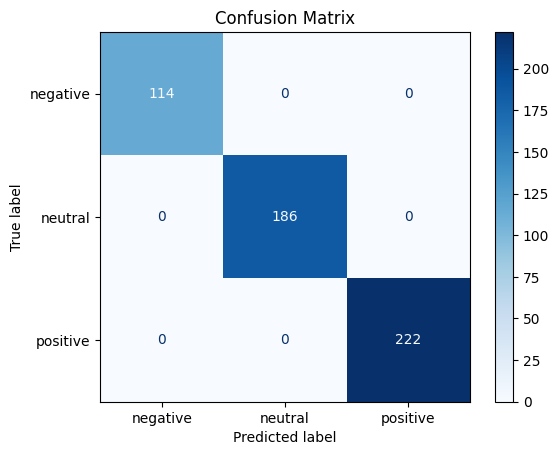

In [18]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Na osnovu dobijenih rezultata vidimo da je model tacno klasifikovao sve instance, što obzirom da se radi o trening setu vrlo verovatno ukazuje na overfitting

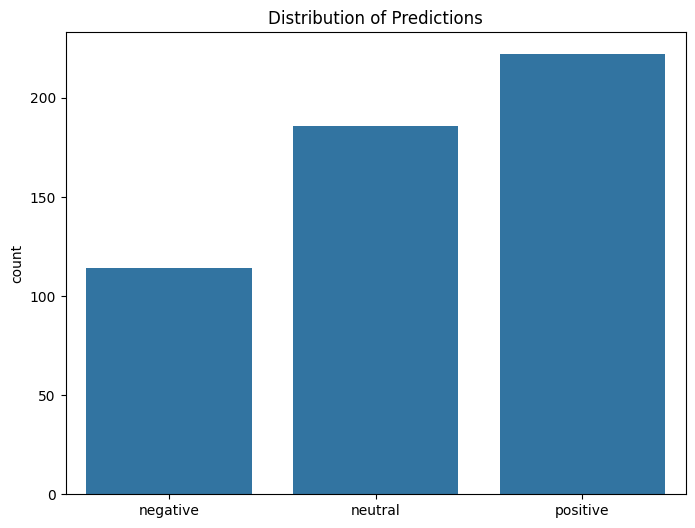

In [19]:
# Plot distribution of predictions
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, order=model.classes_)
plt.title('Distribution of Predictions')
plt.show()

In [20]:
# Classification report
report = classification_report(y_train, y_pred, target_names=model.classes_)
print(report)

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       114
     neutral       1.00      1.00      1.00       186
    positive       1.00      1.00      1.00       222

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522



- Support: Ukupan broj stvarnih instanci za svaku klasu.
- Macro avg: Prosečna vrednost svih klasa, bez obzira na njihovu distribuciju.
- Weighted avg: Težinska prosečna vrednost svih klasa, pri čemu se veći značaj daje klasi sa većim brojem instanci. Ovo se koristi kada su klase nejednako distribuirane.

In [21]:
# Predict sentiment on train set
y_pred = model.predict(X_test)

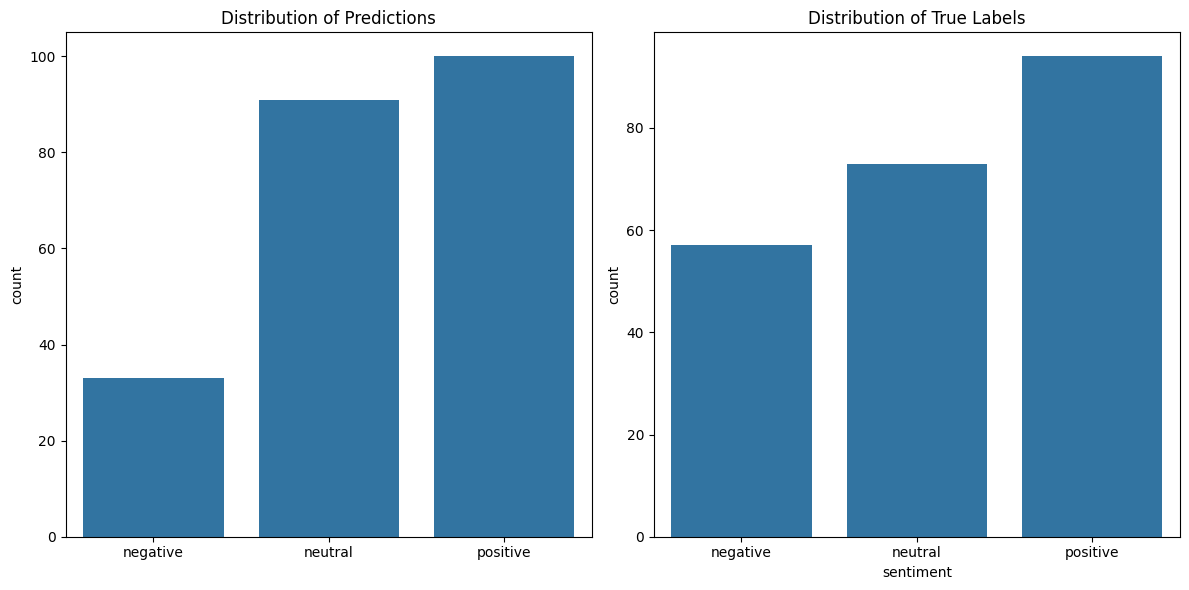

In [22]:
# Plot distribution of predictions
plt.figure(figsize=(12, 6))

# Distribution of Predictions
plt.subplot(1, 2, 1)
sns.countplot(x=y_pred, order=model.classes_)
plt.title('Distribution of Predictions')

# Distribution of True Labels
plt.subplot(1, 2, 2)
sns.countplot(x=y_test, order=model.classes_)
plt.title('Distribution of True Labels')

plt.tight_layout()
plt.show()


In [23]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

<Figure size 1000x800 with 0 Axes>

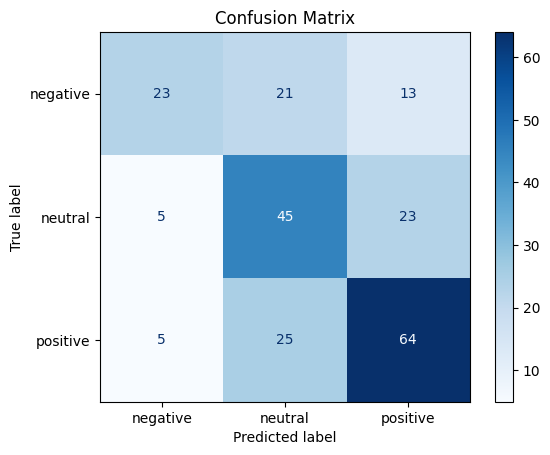

In [24]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [25]:
conf_matrix = cm

def calculate_accuracy(TP, FP, FN, TN):
    total_predictions = TP + FP + FN + TN
    correct_predictions = TP + TN
    return correct_predictions / total_predictions

def calculate_precision(TP, FP):
    return TP / (TP + FP)

def calculate_recall(TP, FN):
    return TP / (TP + FN)

def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

# Definišemo sentiment klase
sentiment_classes = ['negative', 'neutral', 'positive']

# Iteriramo kroz svaku sentiment klasu
for i, sentiment_class in enumerate(sentiment_classes):

    # Izdvajamo relevantne delove matrice konfuzije
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[:, i]) - TP
    FN = np.sum(conf_matrix[i, :]) - TP
    TN = np.sum(conf_matrix) - TP - FP - FN

    # Prikazujemo podmatricu konfuzije
    print(f"Confusion matrix for {sentiment_class} class:")
    print(f"TP: {TP}\tFP: {FP}\nFN: {FN}\tTN: {TN}")


    # Izračunavamo metrike
    accuracy = calculate_accuracy(TP, FP, FN, TN)
    precision = calculate_precision(TP, FP)
    recall = calculate_recall(TP, FN)
    f1 = calculate_f1_score(precision, recall)

    # Prikazujemo metrike
    print()
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    print()



Confusion matrix for negative class:
TP: 23	FP: 10
FN: 34	TN: 157

Accuracy: 0.80
Precision: 0.70
Recall: 0.40
F1 Score: 0.51

Confusion matrix for neutral class:
TP: 45	FP: 46
FN: 28	TN: 105

Accuracy: 0.67
Precision: 0.49
Recall: 0.62
F1 Score: 0.55

Confusion matrix for positive class:
TP: 64	FP: 36
FN: 30	TN: 94

Accuracy: 0.71
Precision: 0.64
Recall: 0.68
F1 Score: 0.66



Ovi rezultati pružaju uvid u performanse klasifikatora za svaku od sentiment klasa. Evo nekoliko zaključaka koje možemo izvući:

**Negativna klasa:**
- Klasifikator ima visoku preciznost (0.70), što znači da kada predviđa negativnu sentiment klasu, tačno predviđa većinu negativnih instanci.
- Međutim, odziv (recall) je relativno nizak (0.40), što znači da je mnogo negativnih instanci ostalo neidentifikovano. Ovo ukazuje na to da klasifikator nije dovoljno senzitivan za negativnu klasu.
- F1 skor (0.51) naglašava balans između preciznosti i odziva, ali ukazuje na potrebu za poboljšanjem odziva.

**Neutralna klasa:**
- Tačnost je prilično solidna (0.67), što ukazuje da je klasifikator relativno dobro identifikovao neutralne instance.
- Preciznost je niža (0.49), što znači da je veliki broj instanci koje su klasifikovane kao neutralne zapravo nešto drugo.
- Odziv je relativno dobar (0.62), što ukazuje na to da klasifikator prilično dobro identifikuje stvarne neutralne instance.
- F1 skor je takođe solidan (0.55), ali ukazuje na mogućnost unapređenja preciznosti.

**Pozitivna klasa:**
- Klasifikator ima relativno visoku preciznost (0.64), što znači da kada predviđa pozitivnu sentiment klasu, tačno predviđa većinu pozitivnih instanci.
- Odziv je takođe prilično visok (0.68), što ukazuje na to da klasifikator dobro identifikuje stvarne pozitivne instance.
- F1 skor (0.66) sugeriše dobar balans između preciznosti i odziva, što je pozitivno.

Uopšteno, ovi rezultati ukazuju na to da klasifikator ima najbolje performanse u identifikaciji pozitivnih instanci, dok postoji prostor za poboljšanje u identifikaciji negativnih i neutralnih instanci.


In [26]:
from sklearn.metrics import balanced_accuracy_score

# Izračunavamo izbalansiranu tačnost
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Balanced Accuracy: {balanced_acc:.2f}")

Balanced Accuracy: 0.57


##### Balanced Accuracy vs. Accuracy

**Balanced Accuracy**: Izbalansirana tačnost je mera performansi klasifikatora koja uzima u obzir neravnotežu klasa. Ona se računa kao prosečna vrednost tačnosti postignute na svakoj klasi. Izbalansirana tačnost može biti korisna kada se suočavamo sa nesrazmernim klasama, jer daje podjednak značaj svakoj klasi.

**Accuracy**: Tačnost je mera performansi klasifikatora koja se računa kao odnos broja tačno predviđenih instanci prema ukupnom broju instanci. Tačnost može biti varljiva u slučaju nesrazmernih klasa, jer može prikazati visoke vrednosti čak i ako je performansa na minornoj klasi loša.

Izbalansirana tačnost (0.57) je niža od klasične tačnosti (0.59). Ovo ukazuje na to da, iako klasifikator ima solidne performanse prema običnoj tačnosti, njegova sposobnost da podjednako dobro klasifikuje sve klase nije optimalna. Niža izbalansirana tačnost sugeriše da klasifikator ne funkcioniše jednako dobro za sve klase, što može biti posebno važno u kontekstu neravnoteže klasa.

In [27]:
# Classification report
report = classification_report(y_test, y_pred, target_names=model.classes_)
print(report)

              precision    recall  f1-score   support

    negative       0.70      0.40      0.51        57
     neutral       0.49      0.62      0.55        73
    positive       0.64      0.68      0.66        94

    accuracy                           0.59       224
   macro avg       0.61      0.57      0.57       224
weighted avg       0.61      0.59      0.59       224



### Macro avg i Weighted avg

**Macro avg**:
- Macro avg predstavlja prosečnu vrednost preciznosti, odziva i F1 skora za sve klase, bez obzira na distribuciju klasa.
- Način izračunavanja:
  - **Macro Precision**: Prosečna preciznost svih klasa.
  - **Macro Recall**: Prosečni odziv svih klasa.
  - **Macro F1 Score**: Prosečan F1 skor svih klasa.

**Weighted avg**:
- Weighted avg predstavlja težinsku prosečnu vrednost preciznosti, odziva i F1 skora, pri čemu se veći značaj daje klasama sa većim brojem instanci.
- **Ponderisana sredina** je srednja vrednost dobijena tako što se svaka vrednost množi odgovarajućim ponderom (u ovom slučaju, brojem instanci u svakoj klasi), a zatim se zbir tih proizvoda deli sa ukupnim brojem instanci.
- Način izračunavanja:
  - **Weighted Precision**: Preciznost se računa za svaku klasu, a zatim se računa ponderisana sredina u odnosu na broj instanci u svakoj klasi.
  - **Weighted Recall**: Odziv se računa za svaku klasu, a zatim se računa ponderisana sredina u odnosu na broj instanci u svakoj klasi.
  - **Weighted F1 Score**: F1 skor se računa za svaku klasu, a zatim se računa ponderisana sredina u odnosu na broj instanci u svakoj klasi.

### Zaključci iz izveštaja

- **Macro avg**:
  - Preciznost (0.61), odziv (0.57), i F1 skor (0.57) pokazuju prosečne performanse modela bez obzira na distribuciju klasa.
  - Ovi rezultati ukazuju na to da model ima slične performanse za sve klase, ali ne uzima u obzir koliko su klase nejednako distribuirane.

- **Weighted avg**:
  - Težinska preciznost (0.61), odziv (0.59), i F1 skor (0.59) uzimaju u obzir distribuciju klasa.
  - Ovi rezultati pružaju realniju sliku performansi modela, s obzirom na to da klase nisu jednako zastupljene.
  - Ukazuje na to da model bolje performira na učestalijim klasama, ali može imati problema sa ređe zastupljenim klasama.

### Ukupni zaključci

- Model ima bolje performanse u identifikaciji učestalijih klasa (pozitivnih instanci), dok ima niže performanse za ređe klase (negativne instance).
- Potrebno je dalje istražiti i poboljšati performanse modela, posebno za identifikaciju negativnih i neutralnih instanci.


## Optimizacija hiperparametara

In [28]:
from sklearn.model_selection import GridSearchCV

**Optimizacija broja neurona i broja slojeva**

Parametri default modela:
- activation: relu
- batch_size: auto
- hidden_layer_sizes: (100,)
- learning_rate_init: 0.001
- max_iter: 1000
- random_state: 42
- solver: adam

*batch_size : int, default=’auto’
Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples).

In [29]:
param_grid = {
    'hidden_layer_sizes': [(50,), (75,), (100,), (50, 50), (30, 30, 30)],  # Number of neurons in the hidden layers
    'activation': ['relu', 'tanh'],  # Activation function for the hidden layers
    'solver': ['adam', 'sgd'],  # Solvers for weight optimization
    'learning_rate_init': [0.001, 0.01],  # Initial learning rate
    'batch_size': [200, 300],  # Batch size
    'max_iter': [500, 1000],  # Maximum number of iterations
    'random_state': [42],
}


**Optimalan scoring parametar**

Optimalan scoring parametar za GridSearch sa krosvalidacijom za model koji predviđa sentiment (sa neizbalansiranim klasama) je često **"f1_weighted"**. Ovaj parametar balansira preciznost i odziv, uzimajući u obzir distribuciju klasa. Ponderisani F1-score se izračunava uzimajući u obzir učestalost svake klase, čime se osigurava da model ne favorizuje dominantne klase.

Zašto "f1_weighted"?
- Neizbalansirane klase: Kada su klase neizbalansirane, obična tačnost (accuracy) može biti varljiva jer će model preferirati predviđanje dominantne klase.
- Balansiranje performansi: F1-score uzima u obzir i preciznost (precision) i odziv (recall), što je ključno za sentiment analizu gde su sve klase važne.
- Ponderisanje prema učestalosti: "f1_weighted" uzima u obzir učestalost svake klase, pružajući realniju sliku performansi modela na neizbalansiranim podacima.

In [30]:
from sklearn.metrics import f1_score, make_scorer

# Definišemo scoring kao f1_weighted
scorer = make_scorer(f1_score, average='weighted')

In [31]:
# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring=scorer, n_jobs=1, verbose=2)

In [32]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=adam; total time=   2.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=adam; total time=   2.1s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=adam; total time=   2.1s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=adam; total time=   2.0s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=adam; total time=   3.0s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=adam; total time= 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.1s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.0s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.6s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.8s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.1s
[CV] END activation=relu, batch_size=200, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.8s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.7s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.6s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.6s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.6s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.1s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   5.2s
[CV] END activation=relu, batch_size=200, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  19.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.6s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(7

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.5s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   4.8s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.8s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.1s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.8s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   5.2s
[CV] END activation=relu, batch_size=200, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  21.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  19.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  20.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  19.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  22.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  19.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  25.2s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.7s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.7s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.7s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.7s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.7s
[CV] END activation=relu, batch_size=200, hidden_layer_si

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.9s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.3s
[CV] END activation=relu, batch_size

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  17.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.5s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=200, hid

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.7s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   0.9s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   0.9s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   0.9s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   0.8s
[CV] END act

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.1s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=r

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.8s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.8s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.1s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.8s
[CV] END activation=relu, batch_size=300, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   8.8s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   3.3s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.0s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   4.9s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.7s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.2s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.4s
[CV] END activation=relu, batch_size=300, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  22.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  16.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.1s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(7

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   4.8s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   1.1s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.6s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.6s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.9s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   4.3s
[CV] END activation=relu, batch_size=300, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  16.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.2s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_si

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=  11.3s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, batch_size=300, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.6s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.2s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.2s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.3s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.2s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.2s
[CV] END activation=relu, batch_size

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   9.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.8s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=300, hid

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   3.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   0.9s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   0.9s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   0.9s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   0.9s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   0.9s
[CV] END act

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   7.4s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.2s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.3s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=relu, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=r

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.4s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.5s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   4.3s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.4s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.4s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.5s
[CV] END activation=tanh, batch_size=200, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  17.6s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  13.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.0s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   5.3s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   4.1s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.4s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.3s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   5.9s
[CV] END activation=tanh, batch_size=200, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  21.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  21.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  20.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  19.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.1s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   1.1s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   1.3s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   1.6s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   1.2s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   1.2s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(7

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  13.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  12.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  12.3s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   6.5s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.7s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.7s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   5.4s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   5.2s
[CV] END activation=tanh, batch_size=200, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  27.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  26.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  28.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  24.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  26.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  25.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  24.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  26.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  23.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  28.4s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.8s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.8s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.8s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.8s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.9s
[CV] END activation=tanh, batch_size=200, hidden_layer_si

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.6s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.8s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.7s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.9s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.2s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.4s
[CV] END activation=tanh, batch_size

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  20.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  19.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  21.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  19.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  19.5s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=200, hid

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.3s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.4s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.3s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.0s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.0s
[CV] END activation=tanh, batch_size=200, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.4s
[CV] END act

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   4.9s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   4.7s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.1s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.1s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.1s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.2s
[CV] END activation=tanh, batch_size=300, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.2s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   7.2s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.9s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.8s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   4.9s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.8s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   2.8s
[CV] END activation=tanh, batch_size=300, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.5s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.5s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(7

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   9.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   9.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   6.1s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(75,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   1.0s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.5s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.2s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   5.1s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.5s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.0s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   3.2s
[CV] END activation=tanh, batch_size=300, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  20.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  19.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  18.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.7s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.8s
[CV] END activation=tanh, batch_size=300, hidden_layer_si

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=  12.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42, solver=sgd; total time=  10.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.7s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42, solver=adam; total time=   0.6s
[CV] END activation=tanh, batch_size=300, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   9.1s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.7s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.5s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.6s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.5s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.6s
[CV] END activation=tanh, batch_size

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  17.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  16.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  14.9s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hid

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=500, random_state=42, solver=sgd; total time=   8.2s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.3s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam; total time=   1.3s
[CV] END act

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  12.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  15.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=sgd; total time=  13.3s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, batch_size=300, hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01, max_iter=500, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=t

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=1,
             param_grid={'activation': ['relu', 'tanh'],
                         'batch_size': [200, 300],
                         'hidden_layer_sizes': [(50,), (75,), (100,), (50, 50),
                                                (30, 30, 30)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [500, 1000], 'random_state': [42],
                         'solver': ['adam', 'sgd']},
             scoring=make_scorer(f1_score, average=weighted), verbose=2)

In [33]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

Best parameters: {'activation': 'relu', 'batch_size': 300, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
Best cross-validation score: 0.594657595661335


Best parameters: {'activation': 'relu', 'batch_size': 300, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
Best cross-validation score: 0.594657595661335


In [41]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

MLPClassifier(batch_size=300, hidden_layer_sizes=(50,), learning_rate_init=0.01,
              max_iter=1000, random_state=42, solver='sgd')

In [42]:
# Predict sentiment on test set
y_pred = best_model.predict(X_test)

In [43]:
# Izračunaj ponderisani F1 skor
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1 Score:", weighted_f1)

Weighted F1 Score: 0.5503615513552218


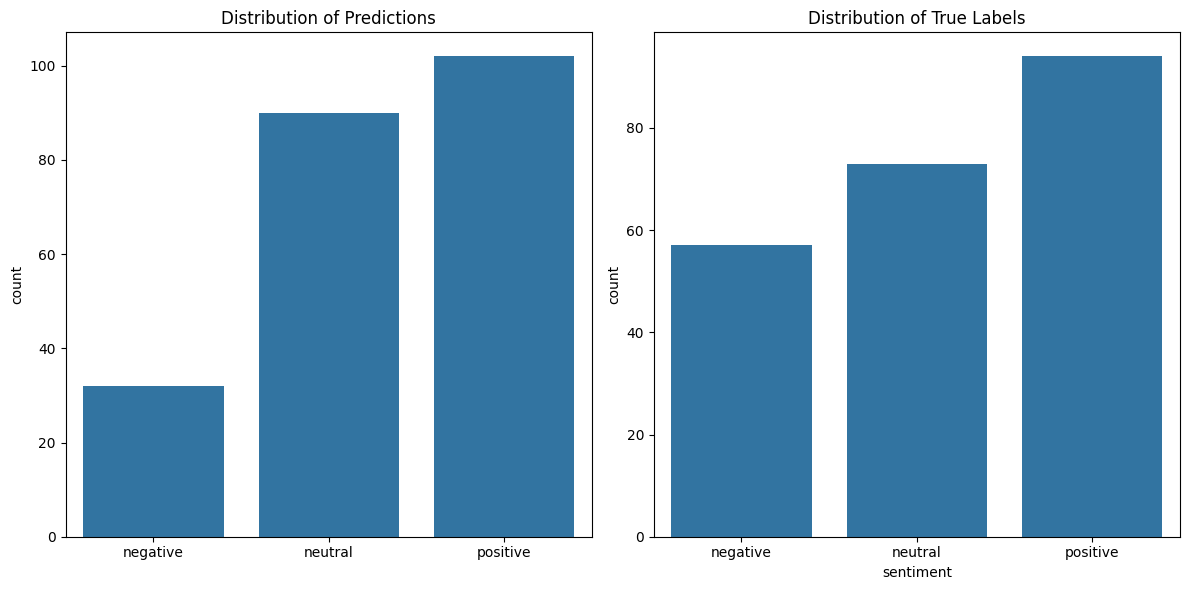

In [44]:
# Plot distribution of predictions
plt.figure(figsize=(12, 6))

# Distribution of Predictions
plt.subplot(1, 2, 1)
sns.countplot(x=y_pred, order=model.classes_)
plt.title('Distribution of Predictions')

# Distribution of True Labels
plt.subplot(1, 2, 2)
sns.countplot(x=y_test, order=model.classes_)
plt.title('Distribution of True Labels')

plt.tight_layout()
plt.show()

In [45]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

<Figure size 1000x800 with 0 Axes>

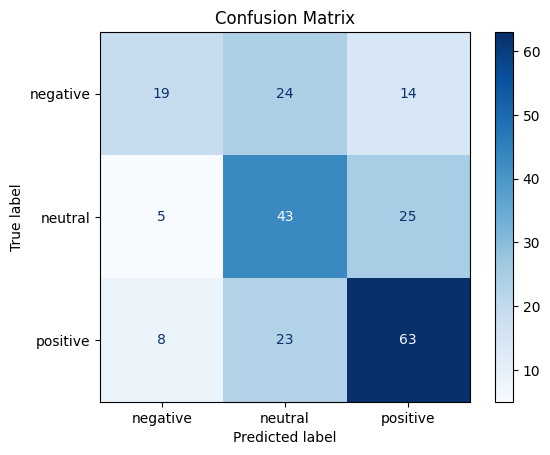

In [46]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [47]:
conf_matrix = cm

def calculate_accuracy(TP, FP, FN, TN):
    total_predictions = TP + FP + FN + TN
    correct_predictions = TP + TN
    return correct_predictions / total_predictions

def calculate_precision(TP, FP):
    return TP / (TP + FP)

def calculate_recall(TP, FN):
    return TP / (TP + FN)

def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

# Definišemo sentiment klase
sentiment_classes = ['negative', 'neutral', 'positive']

# Iteriramo kroz svaku sentiment klasu
for i, sentiment_class in enumerate(sentiment_classes):

    # Izdvajamo relevantne delove matrice konfuzije
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[:, i]) - TP
    FN = np.sum(conf_matrix[i, :]) - TP
    TN = np.sum(conf_matrix) - TP - FP - FN

    # Prikazujemo podmatricu konfuzije
    print(f"Confusion matrix for {sentiment_class} class:")
    print(f"TP: {TP}\tFP: {FP}\nFN: {FN}\tTN: {TN}")


    # Izračunavamo metrike
    accuracy = calculate_accuracy(TP, FP, FN, TN)
    precision = calculate_precision(TP, FP)
    recall = calculate_recall(TP, FN)
    f1 = calculate_f1_score(precision, recall)

    # Prikazujemo metrike
    print()
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    print()



Confusion matrix for negative class:
TP: 19	FP: 13
FN: 38	TN: 154

Accuracy: 0.77
Precision: 0.59
Recall: 0.33
F1 Score: 0.43

Confusion matrix for neutral class:
TP: 43	FP: 47
FN: 30	TN: 104

Accuracy: 0.66
Precision: 0.48
Recall: 0.59
F1 Score: 0.53

Confusion matrix for positive class:
TP: 63	FP: 39
FN: 31	TN: 91

Accuracy: 0.69
Precision: 0.62
Recall: 0.67
F1 Score: 0.64



In [48]:
from sklearn.metrics import balanced_accuracy_score

# Izračunavamo izbalansiranu tačnost
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Balanced Accuracy: {balanced_acc:.2f}")

Balanced Accuracy: 0.53


In [49]:
# Classification report
report = classification_report(y_test, y_pred, target_names=model.classes_)
print(report)

              precision    recall  f1-score   support

    negative       0.59      0.33      0.43        57
     neutral       0.48      0.59      0.53        73
    positive       0.62      0.67      0.64        94

    accuracy                           0.56       224
   macro avg       0.56      0.53      0.53       224
weighted avg       0.57      0.56      0.55       224



                  precision    recall  f1-score   support

    negative       0.70      0.40      0.51        57
     neutral       0.49      0.62      0.55        73
    positive       0.64      0.68      0.66        94

    accuracy                           0.59       224
    macro avg       0.61      0.57      0.57       224
    weighted avg       0.61      0.59      0.59       224

Na osnovu dobijenih rezultata odbacujemo model dobijen optimizacijom hiperparametara